In [1]:
from model_tbyt_2 import GPT, GPTConfig
import torch
import os
itr_num = 20000
#block_size = 8
#vocab_size = 128
block_size = 32
vocab_size = 128
device = 'cpu'
config = GPTConfig(block_size=block_size, vocab_size=vocab_size)
model = GPT(config)
model_state_dict = torch.load(os.path.join(os.getcwd(), f'saved_models/tbyt_1head_2_itr:{itr_num}_checkpoint_old.pt'), map_location=device)['model']
#model_state_dict = torch.load(os.path.join(os.getcwd(), f'sep9_tbyt_n_embd:64_1head_n_layers:2_vocab_size:1024_itr:20000_checkpoint'), map_location=device)['model']
#model_state_dict = torch.load('./saved_models/tbyt_b64_v2048_embd16_1head_2_itr:20000_checkpoint.pt', map_location=device)['model']
model.load_state_dict(model_state_dict)
model.to(device=device)
first_directions = {}

Im in GPT instructor
i initialized n-layers
bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
bias diag is  tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
i initialized transformer
I have initialized all the variables in GPT instructor


In [2]:
batch_size = 1
#test_1_seq = torch.cat((torch.arange(110, 30, -5) , torch.arange(127, 111, -1)), dim=0) 
#print(test_1_seq)
def get_batch(changing_num, changing_index=-1, initial_sequence=None, batch_size=batch_size):
   def cat_sorted_tensor(x):
      if initial_sequence is not None:
         x = initial_sequence
      else:
         x = x
         #x, _ = torch.sort(x, descending=True)
      if changing_num != -1:
         if changing_index == -1:
            x[0] = changing_num
         else:
            x[changing_index] = changing_num
      #x = torch.cat((torch.tensor([100]).repeat(16), torch.tensor([1]).repeat(16)))
      #x = torch.tensor([100,100,100,100,1,1,1,1])
      vals, _ = torch.sort(x)
      #vals2, _ = torch.sort(x, descending=True)
      #print('vals are ', vals)
      return torch.cat((x, torch.tensor([vocab_size]), vals), dim=0)
   #x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:block_size]) for _ in range(batch_size)])
   x = torch.stack([cat_sorted_tensor(torch.randperm(vocab_size)[:32]) for _ in range(batch_size)])
   return x

In [3]:

##just testing the output

idx = get_batch(-1)
position = 50
model.set_position(position)
## this is the group batch one
logits, loss = model(idx)

Vh = model.Vhs[0]
print('Vh shape is ', Vh.shape)


batch_size = 1
idx = get_batch(-1, batch_size=1)
#idx = torch.tensor([[ 99, 109,  55,  39,   7, 102, 100,  67,  11,  27,  78, 113, 122,  94,
#          71,  81,  92,  20,  49,  59,  51, 127,  19, 126,  64,  30,  96,  22,
#          46,  62, 112, 123, 128,   7,  11,  19,  20,  22,  27,  30,  39,  46,
#          49,  51,  55,  59,  62,  64,  67,  71,  78,  81,  92,  94,  96,  99,
#         100, 102, 109, 112, 113, 122, 123, 126, 127]])
idx = torch.tensor([[ 99, 109,  55,  39,   7, 102, 100,  67,  11,  27,  78, 113, 122,  94,
          71,  81,  92,  20,  49,  59,  51, 127,  45, 126,  64,  30,  96,  22,
          46,  62, 112, 123, 128,   7,  11,  19,  20,  22,  27,  30,  39,  46,
          49,  51,  55,  59,  62,  64,  67,  71,  78,  81,  92,  94,  96,  99,
         100, 102, 109, 112, 113, 122, 123, 126, 127]])



im here!!! tensor([[[-0.0096,  0.0472, -0.0774,  ..., -0.0567, -0.0403,  0.0376],
         [ 0.0196, -0.0613,  0.0342,  ...,  0.0677,  0.0383, -0.0577],
         [-0.0016, -0.0824,  0.0479,  ...,  0.0414, -0.0306,  0.0056],
         ...,
         [-0.0595,  0.0247, -0.0449,  ..., -0.1551, -0.0751,  0.0635],
         [-0.1147,  0.0545, -0.0189,  ..., -0.0900, -0.0205,  0.0072],
         [-0.0910,  0.1814,  0.0262,  ...,  0.0426, -0.0217, -0.0858]]],
       grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
attn location 9 is  tensor(-11.3682, grad_fn=<SelectBackward0>)
attn location 17 is  tensor(-9.5077, grad_fn=<SelectBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  tensor([[[-0.0166,  0.0366, -0.0662,  ..., -0.0560, -0.0453,  0.0273],
         [ 0.0208, -0.0633,  0.0447,  ...,  0.0770,  0.0375, -0.0630],
         [-0.0055, -0.0915,  0.0541,  ...,  0.0425, -0.0379, -0.0049],
         ...,
         [-0.0166,  

In [4]:
## this is the single batch one
logits, loss = model(idx)
print(f'idx is: {idx}')
import matplotlib.pyplot as plt
#plt.plot(logits[0,63,:].detach().numpy())
#print('this is ',logits[0,39,:] )
#print('this is ',logits[0,57,:] )
print(f'result is: {torch.argmax(logits, dim=-1)}')


## plotting the attention scores
#import matplotlib.pyplot as plt
#plt.plot(model.transformer.h[0].c_attn.attn[0,0,39,:].to('cpu').detach().numpy())
#print('xxx ', idx[0,torch.argmax(model.transformer.h[0].c_attn.attn[0,0,39,:])])



#print('numbers of position 34 are ')
#import matplotlib.pyplot as plt


#plt.figure(2)
#plt.vlines(range(65), -5, 25, color='orange', linestyles='dashed')
#plt.plot(idx[:,34])

#plt.show()

#x, _ = torch.sort(x[0])
#x = torch.unsqueeze(x, dim=0)

im here!!! tensor([[[-2.8802e-02,  6.4145e-02, -2.2041e-02,  ..., -7.0767e-02,
           5.6261e-02,  3.5511e-02],
         [ 9.0163e-03,  6.6218e-02, -6.1901e-02,  ..., -7.0158e-02,
           4.3761e-02,  3.6390e-02],
         [ 1.4385e-02, -3.0005e-02,  4.9660e-02,  ...,  7.0779e-02,
          -5.9859e-02, -3.9102e-02],
         ...,
         [-6.7510e-02,  6.0002e-02, -9.6636e-02,  ..., -1.5366e-01,
           1.0212e-02,  4.6809e-02],
         [-7.7048e-02,  1.7055e-01, -1.5429e-04,  ..., -8.8520e-02,
          -1.6936e-02, -8.3001e-02],
         [-9.0971e-02,  1.8137e-01,  2.6248e-02,  ...,  4.2617e-02,
          -2.1690e-02, -8.5772e-02]]], grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
attn location 9 is  tensor(10.5215, grad_fn=<SelectBackward0>)
attn location 17 is  tensor(12.1423, grad_fn=<SelectBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  tensor([[[-0.0358,  0.0536, -0.0108,  ..., -0.0701,

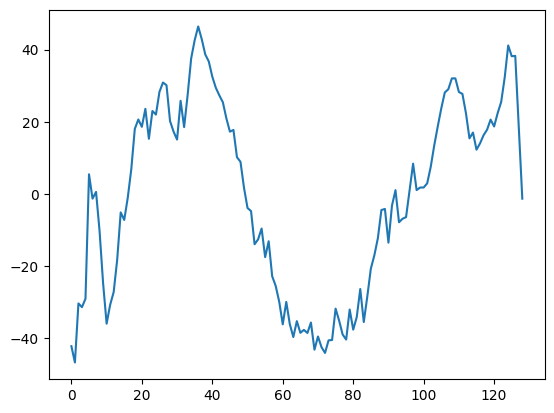

In [ ]:
### manually changing the attention of some position in layer 0
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)

pos35 = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx)[0,35] + model.transformer.wpe(torch.arange(65).to(device))[0,35]))
rawpos35 = model.transformer.wte(idx)[0,35] + model.transformer.wpe(torch.arange(65).to(device))[0,35]
## position 9
pos9 = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx)[0,9] + model.transformer.wpe(torch.arange(65).to(device))[0,9]))
## position 22
pos22 = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx)[0,22] + model.transformer.wpe(torch.arange(65).to(device))[0,22]))
## position 27
pos27 = model.transformer.h[0].c_attn.c_proj(vweights @ model.transformer.h[0].ln_1(model.transformer.wte(idx)[0,27] + model.transformer.wpe(torch.arange(65).to(device))[0,27]))
x1 = rawpos35 + 0.33 * pos27 + 0.33 * pos22 + 0.33 * pos9
x2 = model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(x1)) + x1
x3 = model.transformer.h[1].c_fc(model.transformer.h[1].ln_2(x2)) + x2
plt.plot(model.lm_head(x3).detach().numpy())
plt.xlabel("Vocabulary index")
plt.ylabel("Logit value")
plt.title("Output logits at modified position")

[1.1803021e-10 6.5781922e-09 1.0494110e-12 2.1317715e-06 2.2932806e-03
 3.7929951e-13 1.3841631e-07 2.1080823e-05 8.0846108e-11 5.4712521e-14
 2.4816022e-13 2.8015177e-11 2.8745753e-05 7.6483948e-09 5.7868293e-12
 3.1197176e-09 6.7318142e-05 3.3095142e-17 6.1958621e-05 2.3555747e-12
 2.1673295e-04 3.1955261e-10 5.3818057e-05 1.2730639e-08 4.8812039e-12
 4.8605237e-08 2.9382600e-05 8.0417922e-06 7.2504872e-06 1.3429025e-06
 1.3767382e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]


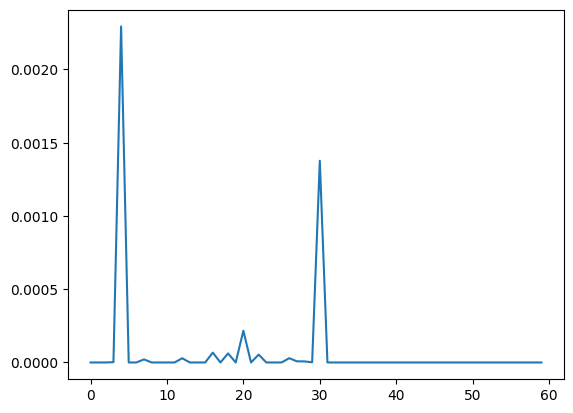

In [ ]:
## show the attention itself
#attn = model.transformer.h[0].c_attn(
#    model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))), return_attention=True)
attn = model.transformer.h[0].c_attn.attn
query_pos = 35
plt.plot(attn[0, 0, query_pos, :].detach().numpy())
plt.xlabel("Token position")
plt.ylabel("Attention weight")
plt.title(f"Self-attention weights (layer 0, head 0, query pos {query_pos})")
print(attn[0, 0, query_pos, 5:].detach().numpy())

engevalues of weights fc_1 are  tensor([20.4999, 18.0655, 10.8411,  8.0886,  4.5375,  3.5252,  3.3214,  2.9462,
         2.2852,  2.0193,  1.5928,  1.4618,  1.1235,  1.0833,  0.9701,  0.9464,
         0.8241,  0.7547,  0.7011,  0.6691,  0.6650,  0.5853,  0.5534,  0.5398,
         0.4845,  0.4668,  0.4507,  0.4250,  0.4034,  0.3868,  0.3828,  0.3757,
         0.3610,  0.3510,  0.3401,  0.3323,  0.3278,  0.3249,  0.3178,  0.3032,
         0.2960,  0.2891,  0.2832,  0.2754,  0.2687,  0.2598,  0.2566,  0.2465,
         0.2422,  0.2386,  0.2376,  0.2242,  0.2231,  0.2161,  0.2146,  0.2055,
         0.1970,  0.1920,  0.1836,  0.1728,  0.1633,  0.1599,  0.1519,  0.1405],
       grad_fn=<LinalgSvdBackward0>)
engevalues of weights fc_2 are  tensor([13.3654, 10.8815,  8.5596,  6.6513,  3.6126,  3.2025,  2.7963,  2.1518,
         2.1442,  1.6278,  1.3717,  1.3005,  1.1962,  0.9690,  0.9045,  0.8619,
         0.8319,  0.7727,  0.7333,  0.7085,  0.6357,  0.5796,  0.5697,  0.5323,
         0.5234,  

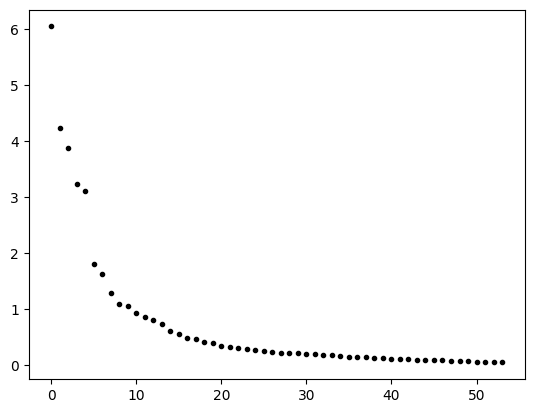

In [ ]:
## svd on weights of second fully connected layer
U, S, V = torch.svd(model.transformer.h[1].c_fc.fc_1.weight)
U, S_2, V = torch.svd(model.transformer.h[1].c_fc.fc_2.weight)
U, S_3, V = torch.svd(model.transformer.h[1].c_fc.fc_2.weight + model.transformer.h[1].c_fc.fc_1.weight.t())
import matplotlib.pyplot as plt
print('engevalues of weights fc_1 are ', S)
print('engevalues of weights fc_2 are ', S_2)
print('engevalues of weights fc_2 * fc_1 are ', S_3)
#plt.plot(((S) ** 2).detach().numpy()[10:])
#plt.plot(((S_2) ** 2).detach().numpy()[10:])
plt.plot((S_3 ** 2).detach().numpy()[10:], "k.")
plt.xlabel("Singular value index")
plt.ylabel("Squared singular value")
plt.title("Spectrum of FC2 + FC1ᵀ (layer 1)")


In [9]:
position = 39
## try the second layer with the signal from a different number
#idx = torch.tensor([128] * 16 + [vocab_size] + [1] * 16).unsqueeze(0)
#idx = get_batch(-1, initial_sequence=idx[0,:32], batch_size=1)
res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
vec = res_stream_1_without_residual[0,position,:]
res_stream_1_without_residual[0,position - 1,:] = vec
x = res_stream_1_without_residual + model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))
res_stream_1 = model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(x)) + x
f_logits = model.lm_head(model.transformer.h[1](res_stream_1))
print(f'new result is: {torch.argmax(f_logits, dim=-1)}')

x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
im here!!! tensor([[[-18.0324,   8.3069,   7.7283,  ...,   2.6203,  16.3685, -37.0546],
         [ -8.5333,  -0.8445,  -3.4631,  ..., -23.5124,  23.7209, -20.9444],
         [-13.8122,   9.0185,   7.9220,  ...,  11.4243,   8.2612, -37.2412],
         ...,
         [-24.1157,  28.8959, -36.0336,  ...,   5.2895,  14.9640, -41.6789],
         [-23.6141,  29.2498, -33.8226,  ...,   3.4333,  19.7243, -51.2920],
         [ -3.7761,  21.3654, -10.9134,  ..., -16.1286,  17.3941, -23.2435]]],
       grad_fn=<AddBackward0>)
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
don have to be here!
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
new result is: tensor([[ 12,  15,  12,  12,  16, 127, 126, 126, 123,   0,   6,  25, 127,  10,
         127,  32,  12, 127,   9, 124,   6,  49,   4,  20, 124, 127, 124, 124,
       

x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
thissss is  None
attn dim is  torch.Size([1, 1, 65, 65])
vec dim  torch.Size([64])  first_direction shape  torch.Size([64])
x shape is  torch.Size([1, 65, 64])
this

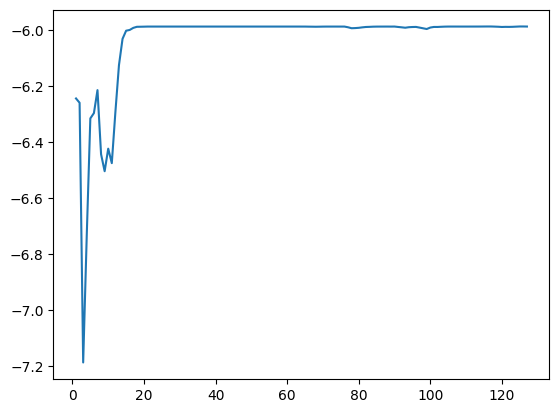

torch.Size([64])


In [ ]:
direction = 10
first_direction = Vh[direction,:]
first_directions[position] = first_direction
vals = []
idx = torch.tensor([128] * 16 + [vocab_size] + [1] * 16).unsqueeze(0)
idx = get_batch(-1, initial_sequence=idx[0,:32], batch_size=1)
## actuallly position 55 can only change from 85 to 93
for changing_num in range(1, 128):
    idx = get_batch(changing_num, initial_sequence=idx[0,:32], batch_size=1)
    ## obtaining output of first layer without residual
    res_stream_1_without_residual = model.transformer.h[0].c_attn(model.transformer.h[0].ln_1(model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))))
    x = res_stream_1_without_residual + model.transformer.wte(idx) + model.transformer.wpe(torch.arange(65).to(device))
    res_stream_1 = model.transformer.h[0].c_fc(model.transformer.h[0].ln_2(x))
    vec = res_stream_1[0,position,:]
    print('vec dim ', vec.shape, ' first_direction shape ', first_direction.shape)
    vals.append(torch.dot(vec, first_direction).item())


print('projection of non-residual part after first layer in position 34' \
' in direction of the first singular vector as a function of first number of the seuqnece:')
print('class of vals is ', type(vals))
import numpy as np
import matplotlib.pyplot as plt
plt.plot(range(1, 128), vals)
plt.xlabel("Changed token value")
plt.ylabel("Projection magnitude")
plt.title("Projection onto first singular direction vs. token value")
plt.show()

##projectinig onto U

print(first_direction.shape)
#logits, loss = model.without_pos_embd(idx)
#print('loss is ', loss.item())


torch.Size([129])

In [77]:
first_directions[40].shape

torch.Size([129])

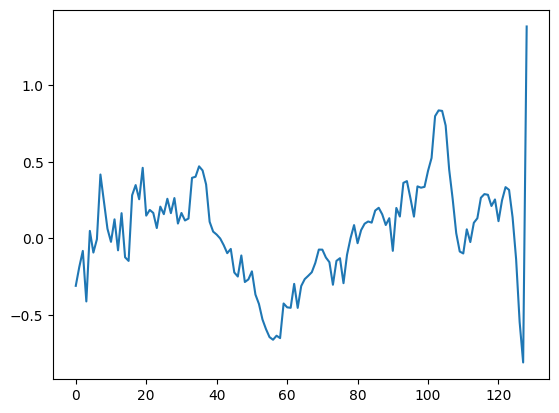

In [ ]:
## see the interaction of the first principal direction in the second layer weights
import matplotlib.pyplot as plt
qweights2, kweights2, vweights2 = model.transformer.h[1].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
scores = model.transformer.h[0].ln_1(model.transformer.wte.weight)  @ vweights.t() @ model.transformer.h[0].c_attn.c_proj.weight.t() @ first_directions[position]
scores2 = model.transformer.wpe.weight @ qweights2.t() @ kweights2 @ model.transformer.wpe.weight.t()
U, S, Vh = torch.linalg.svd(scores2)
#plt.plot(S.detach().numpy()[3:])
plt.plot(scores.detach().numpy())
#print('Vh dim is ', Vh.shape)
#plt.plot(scores.detach().numpy())
#plt.colorbar()

plt.xlabel("Vocabulary index")
plt.ylabel("Interaction score")
plt.title("Interaction of first principal direction with vocab embeddings")

plt.show()

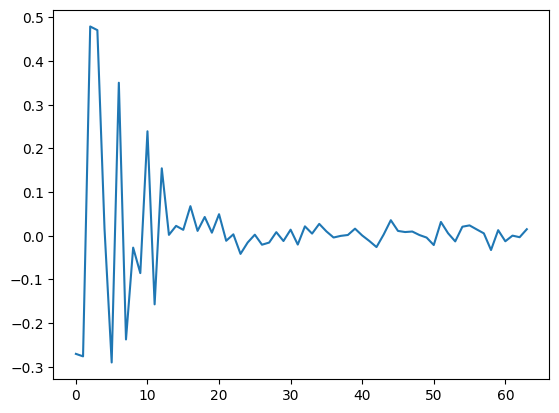

In [ ]:
#torch.dot(first_directions[35], first_directions[45])
qweights, kweights, vweights = model.transformer.h[0].c_attn.c_attn.weight.split(model.config.n_embd, dim=0)
U, S, V = torch.linalg.svd((model.transformer.h[0].c_attn.c_proj.weight @ vweights))
import matplotlib.pyplot as plt
#plt.plot(S.detach().numpy())
uweightsSVD_1 = U[:,0]
vweightsSVD_1 = V[0,:]
#print(torch.dot(V, first_directions[35]))
#print(S[10])
plt.plot((U.t() @ first_directions[40]).detach().numpy())
plt.xlabel("Singular vector index")
plt.ylabel("Projection value")
plt.title("Projection of direction 40 onto attention SVD basis")

In [8]:
import torch
U, D, Vh = torch.linalg.svd(torch.tensor([[1.0, 1.0], [1.0, 0.0]]))
print('U is ', U) 
print('D is ',torch.diag(D))
print('Vh is ', Vh)
print('product is ', U @ torch.diag(D) @ Vh)

U is  tensor([[-0.8507, -0.5257],
        [-0.5257,  0.8507]])
D is  tensor([[1.6180, 0.0000],
        [0.0000, 0.6180]])
Vh is  tensor([[-0.8507, -0.5257],
        [ 0.5257, -0.8507]])
product is  tensor([[1.0000e+00, 1.0000e+00],
        [1.0000e+00, 8.9407e-08]])
